In [88]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree


In [89]:
data = pd.read_csv("hmelq.csv")
df = data.copy()

In [90]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [93]:
df.shape

(3576, 13)

In [94]:
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [95]:
df = df.dropna()

In [96]:
#kategorik değişkenler için dummy uyguluyorum
dms = pd.get_dummies(df[['job', 'reason']])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [97]:
df =  df.drop(["job","reason"], axis = 1)
df.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [98]:
df = pd.concat([df, dms], axis = 1)
df

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,0,1,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,0,1,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,0,1,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0,0,1
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,0,0,0,0,1,0,1
3546,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,0,0,0,0,1,0,1
3547,1,27300,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,0,0,0,0,0,1,1,0
3548,1,37300,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,0,0,0,0,1,0,1


In [99]:
df["bad"].value_counts()
# bad'in dagılımına baktık

0    1840
1     178
Name: bad, dtype: int64

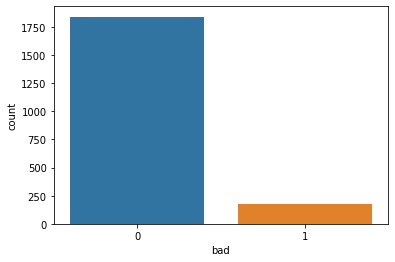

In [100]:
sns.countplot(df['bad'])


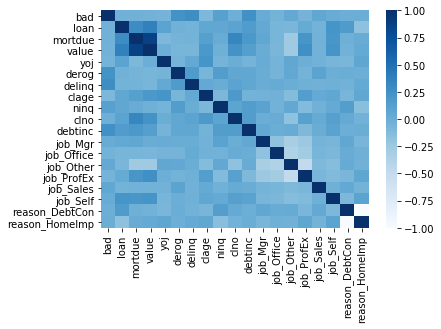

In [101]:
sns.heatmap(df.corr(), cmap='Blues');

In [102]:
y = df["bad"]
X = df.drop(['bad'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [105]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[2] <= 36741.5 else (0 if x[1] <= 16220.0 else 1) if x[3] <= 
    7.0 else 0) if x[9] <= 32.76449966430664 else 0 if x[3] <= 1.5 else (1 if
    x[12] <= 0.5 else 0) if x[8] <= 6.0 else 1) if x[0] <= 12750.0 else 0 if
    x[7] <= 4.0 else 1) if x[2] <= 48600.0 else ((((((((((1 if x[9] <= 
    33.51150035858154 else 0) if x[1] <= 39828.0 else 1 if x[8] <= 8.0 else
    ((1 if x[3] <= 2.5 else 0 if x[7] <= 2.5 else 1 if x[0] <= 14850.0 else
    0) if x[6] <= 70.125 else 1) if x[6] <= 71.81999969482422 else (0 if x[
    0] <= 9450.0 else 0 if x[2] <= 66659.0 else 1) if x[16] <= 0.5 else 0) if
    x[2] <= 85577.5 else 1) if x[6] <= 94.25 else 0 if x[2] <= 72614.0 else
    1) if x[2] <= 86023.5 else (0 if x[1] <= 83854.0 else 1) if x[8] <= 9.5
     else 0) if x[6] <= 95.79000091552734 else ((0 if x[16] <= 0.5 else (1 if
    x[12] <= 0.5 else 0) if x[8] <= 28.0 else 0) if x[4] <= 0.5 else 1 if x
    [6] <= 220.90999603271484 else 0) if x[0] <= 6950.0 else ((((1 if x[0] <=
    10300

In [107]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9240924092409241

In [108]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [110]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 4305 out of 4320 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    6.6s finished


In [111]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'min_samples_split': 2}


In [112]:
cart = tree.DecisionTreeClassifier(max_depth = 9, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

[Text(236.45250000000001, 206.56799999999998, 'X[9] <= 45.644\ngini = 0.163\nsamples = 1412\nvalue = [1286, 126]'),
 Text(226.8867857142857, 184.824, 'X[5] <= 3.5\ngini = 0.132\nsamples = 1384\nvalue = [1286, 98]'),
 Text(147.6707142857143, 163.07999999999998, 'X[2] <= 48600.0\ngini = 0.118\nsamples = 1369\nvalue = [1283, 86]'),
 Text(62.177142857142854, 141.336, 'X[0] <= 12750.0\ngini = 0.347\nsamples = 85\nvalue = [66, 19]'),
 Text(38.26285714285714, 119.592, 'X[9] <= 32.764\ngini = 0.492\nsamples = 39\nvalue = [22, 17]'),
 Text(19.13142857142857, 97.848, 'X[2] <= 36741.5\ngini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(9.565714285714286, 76.10399999999998, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(28.697142857142858, 76.10399999999998, 'X[3] <= 7.0\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(19.13142857142857, 54.360000000000014, 'X[9] <= 24.55\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(9.565714285714286, 32.615999999999985, 'gini = 0.0\nsamples = 1\n

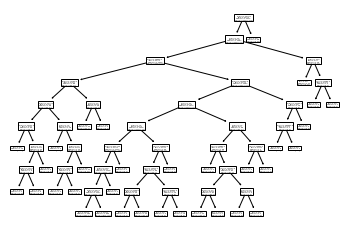

In [113]:
tree.plot_tree(cart) 

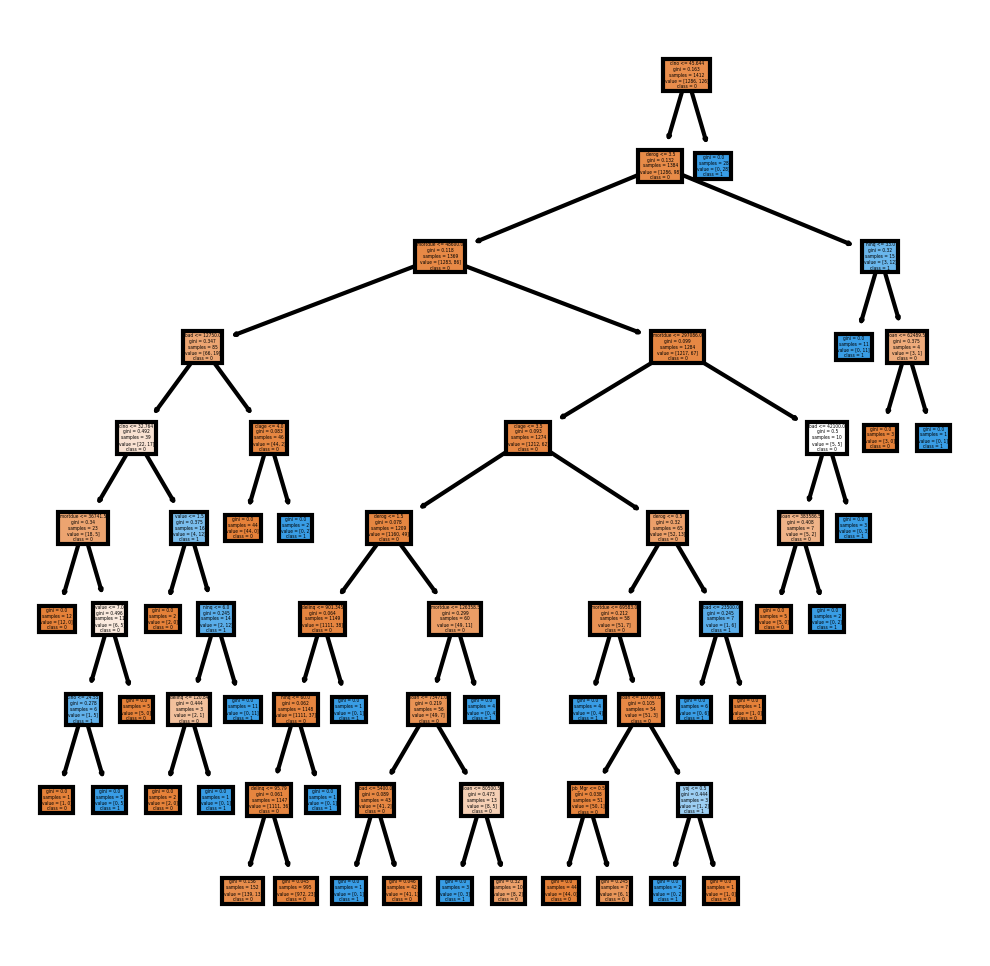

In [114]:
fn=df.columns
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(cart,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [117]:
!pip install graphviz

In [119]:
import graphviz 

In [122]:
fn=df.columns
cn=['0', '1']
tree.export_graphviz(cart,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

ValueError: Length of feature_names, 19 does not match number of features, 18

In [87]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9488448844884488